In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pickle

In [2]:
data = pd.read_csv('loan_detection.csv')
data

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [3]:
# EDA
print("Dataset Overview:")
data.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13

In [4]:
print("\nFirst 5 Rows:")
data.head()


First 5 Rows:


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
data.isna().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [6]:
# Check for class distribution
print("\nTarget Variable Distribution:")
data['Loan_Status_label'].value_counts()


Target Variable Distribution:


Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

In [7]:
# Data Preprocessing
X = data.drop('Loan_Status_label', axis=1)  # Drop the target variable
y = data['Loan_Status_label']

In [8]:
#Data Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [11]:
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy)
    print("AUC-ROC:", auc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8957271182325808
AUC-ROC: 0.7481175050030717
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.64      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238


Decision Tree Results:
Accuracy: 0.8351541636319495
AUC-ROC: 0.6083045499578592
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7303
           1       0.29      0.31      0.30       935

    accuracy                           0.84      8238
   macro avg       0.60      0.61      0.60      8238
weighted avg       0.84      0.84      0.84      8238


Random Forest Results:
Accuracy: 0.8868657441126487
AUC-ROC: 0.7398231332666013
Classification Report:
              precision    r

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8929351784413693
AUC-ROC: 0.7455692884251657
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.57      0.23      0.33       935

    accuracy                           0.89      8238
   macro avg       0.74      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



In [12]:
results[name] = {"accuracy": accuracy, "auc": auc}

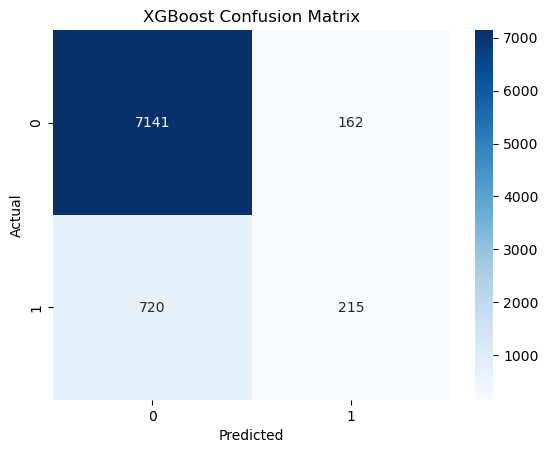

In [13]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# Model Comparison
results_df = pd.DataFrame(results).T
results_df.sort_values(by="accuracy", ascending=False, inplace=True)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
         accuracy       auc
XGBoost  0.892935  0.745569


In [15]:
# Hyperparameter Tuning for Best Model
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}
print('h')

h


In [16]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # Number of folds for cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available cores
)
print('h')

h


In [17]:
print("Fitting RandomizedSearchCV...")
random_search.fit(X_train, y_train)
print("Random search completed!")

Fitting RandomizedSearchCV...
Random search completed!


In [18]:
print("\nBest Parameters for Random Forest:")
print(random_search.best_params_)


Best Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_depth': None}


In [19]:
best_rf = random_search.best_estimator_

In [20]:
# Evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nBest Random Forest Accuracy:", accuracy)


Best Random Forest Accuracy: 0.8962126729788784


In [21]:
# Feature Importance from Random Forest
importances = best_rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                          Feature  Importance
0                             age    0.124259
2                           pdays    0.118725
58               poutcome_success    0.076135
4             no_previous_contact    0.074832
1                        campaign    0.042038
46                      month_mar    0.039295
3                        previous    0.031684
49                      month_oct    0.030573
45                      month_jun    0.025979
40              contact_telephone    0.021119
50                      month_sep    0.020214
47                      month_may    0.018880
41                      month_apr    0.018415
39               contact_cellular    0.015968
57           poutcome_nonexistent    0.015952
53                day_of_week_thu    0.013900
52                day_of_week_mon    0.013680
56               poutcome_failure    0.013332
28    education_university.degree    0.012882
54                day_of_week_tue    0.012717
33                     housing_no 

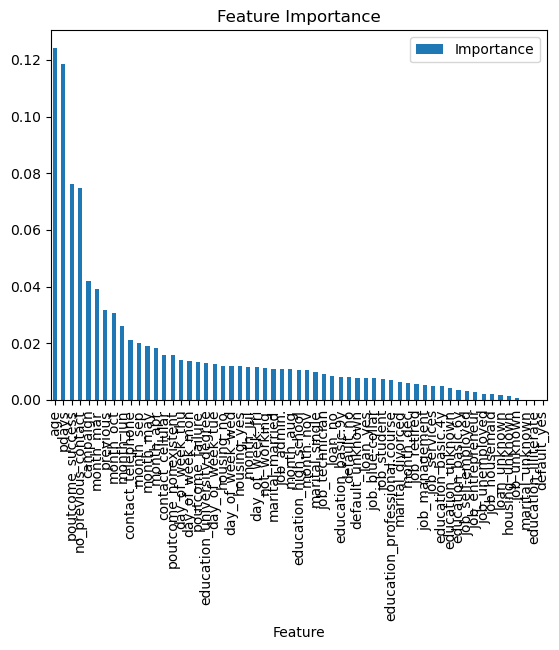

In [22]:

# Plot the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', title='Feature Importance')
plt.show()

In [52]:
# Save the Best Model
with open('loan_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("\nBest model saved as 'loan_model.pkl'")


Best model saved as 'loan_model.pkl'


In [50]:
#complete 
print("\nYour project is complete! You can deploy the model using Streamlit or Flask.")


Your project is complete! You can deploy the model using Streamlit or Flask.


In [56]:
import os
print(os.getcwd())

C:\Users\Lenovo\pregrad-sept\MACHINE LEARNING
